# Индивидуальное задание

### Отработка главы 3.1

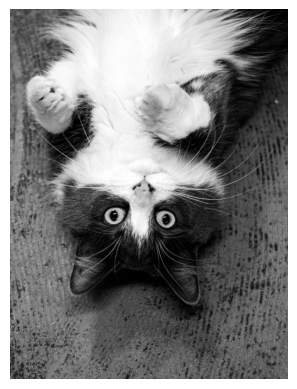

In [852]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/cat_ind.jpg', 0)
img_с = cv2.imread('img/cat_ind.jpg', 1)
imag = cv2.imread('img/cat_ind.jpg', 0)
# вывод изображения
plt.imshow(img, 'gray')
plt.axis("off");

Получим контур и топологическую структуру изображения:
Контур (первое возвращаемое значение) – это список, в котором хранятся все контуры изображения. Каждый контур представляет собой массив numpy, содержащий координаты точек границы объекта (x, y)
Топологической структурой (иерархия) – называется связь одного контура с другим, при помощи иерархии можно определить является ли контур дочерним или родительским по отношению к другому, если это необходимо


In [853]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

Выделим один внешний контур

In [854]:
cnt = contours[0]

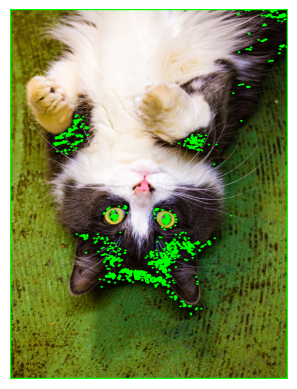

In [855]:
# отображаем контур поверх изображения
cv2.drawContours(img_с, contours, -1, (0,255,0), 2)
plt.imshow(img_с[...,::-1])
plt.axis("off");

Найдём площадь ограниченную контуром

In [856]:
ar = cv2.contourArea(cnt)
print("Площадь: ", ar)

Площадь:  306078.5


Теперь получим длину контурного периметра

In [857]:
prm = cv2.arcLength(cnt, True)
print("Длина контурного параметра: ", prm)

Длина контурного параметра:  2237.41421353817


Моменты представляют собой среднее значение интенсивности пикселей изображения.
Найдём их:

In [858]:
M = cv2.moments(cnt)
print("Моменты: ", M)

Моменты:  {'m00': 306078.5, 'm10': 73305371.33333333, 'm01': 97792878.33333333, 'm20': 23408754054.916664, 'm11': 23421394160.541664, 'm02': 41659766666.25, 'm30': 8409572897716.7, 'm21': 7479231824540.149, 'm12': 9977514116438.15, 'm03': 19965443175159.2, 'mu20': 5852220465.272545, 'mu11': 136999.45231246948, 'mu02': 10414687208.79665, 'mu30': 11961195.475585938, 'mu21': 8282805.472900391, 'mu12': -29096401.10986328, 'mu03': -236144.7265625, 'nu20': 0.062467630082948304, 'nu11': 1.4623562388679255e-06, 'nu02': 0.11116820219766348, 'nu30': 2.3077700192597592e-07, 'nu21': 1.5980685362709371e-07, 'nu12': -5.613803594026585e-07, 'nu03': -4.556130875710274e-09}


Получим высоту и ширину

In [859]:
x, y, w, h = cv2.boundingRect(cnt)
print("Ширина и высота: ", x, y, w, h)

Ширина и высота:  0 0 480 640


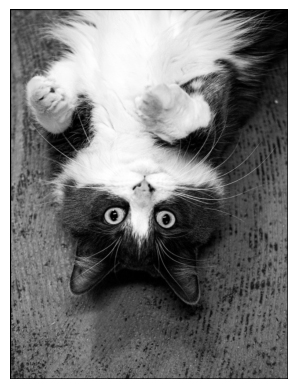

In [860]:
imag = cv2.rectangle(imag, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(imag, 'gray')
plt.axis('off');

Найдём отношение ширины к высоте

In [861]:
asprat = float(w) / h
print("Отношение ширины к высоте: ", asprat)

Отношение ширины к высоте:  0.75


Найдём отношение площади контура к площади ограничивающего прямоугольника

In [862]:
rectar = w * h
extent = float(ar) / rectar
print("Отношение площади контура к площади ограничивающего прямоугольника: ", extent)

Отношение площади контура к площади ограничивающего прямоугольника:  0.9963492838541667


Найдём эквивалентный диаметр:

In [863]:
eqdiam = np.sqrt(4 * ar / np.pi)
print("Эквивалентный диаметр:", eqdiam)

Эквивалентный диаметр: 624.2685720050478


# Задание 3.2 Характерные параметры бинарных изображений

### Задание 3.2.
Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

In [864]:
img = cv2.imread('img/cat_art.jpg', 0)
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

Получим маску изображения

In [865]:
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))

Максимальное и минимальное значения и их координаты

In [866]:
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

Найдём крайние точки изображения

In [867]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

Средняя интенсивность

In [868]:
meanv = cv2.mean(img, mask=mask)

Ориентация – это угол, под которым направлено выделенное направление изображения. Найдём её

In [869]:
(x, y), (MA, ma), ang = cv2.fitEllipse(cnt)

In [870]:
print("Пиксельные точки: ", pixpoin)
print("Максимальное и минимальное значения и их координаты:", minv, maxv, minl, maxl)
print("Крайние точки: ", leftmost, rightmost, topmost, bottommost)
print("Средняя интенсивность: ", meanv)
print("Ориентация: ", ang)

Пиксельные точки:  [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [639 477]
 [639 478]
 [639 479]]
Максимальное и минимальное значения и их координаты: 2.0 246.0 (283, 513) (54, 313)
Крайние точки:  (0, 0) (479, 0) (0, 0) (479, 639)
Средняя интенсивность:  (66.70671549479167, 0.0, 0.0, 0.0)
Ориентация:  0.0
